$\left\{\begin{array}{l}\dot{x}=2 x-y \\ \dot{y}=5 x-3 y\end{array}\right.$

$$Q(x, y)=\dot{y}$$
$$P(x, y)=\dot{x}$$
$$\frac{d y}{d x}=A=\frac{Q}{P}$$
for line $x=y$ find $\alpha$ crossing phase trajectories
$$\tan(\alpha) = A \Rightarrow \alpha = \arctan A$$

In [482]:
from sympy import atan ,pi
P = lambda x,y : 2*x - y 
Q = lambda x,y : 5*x - 3*y
# y = x so lets make a change f(x,y) - > f(x,x)
A = Q(x,x)/P(x,x)
alpha = float((atan(A)  * 360) / (2 * pi))
print(f'alpha = {alpha:.4} degrees')


alpha = 63.43 degrees


$\alpha = 63.47^{\circ}$

Our point (0,0) are isolated special point so we have no crossing lines in this area


(-5, 5)

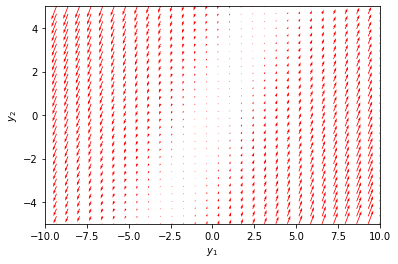

In [483]:
import numpy as np
import matplotlib.pyplot as plt

def f(Y, t):
    y1, y2 = Y
    return [2*y1-y2, 5*y1-3*y2]

y1 = np.linspace(-10.0, 10.0, 30)
y2 = np.linspace(-5.0, 5.0, 30)

Y1, Y2 = np.meshgrid(y1, y2)

t = 0

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

NI, NJ = Y1.shape

for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = f([x, y], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]
     

Q = plt.quiver(Y1, Y2, u, v, color='r')

plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.xlim([-10, 10])
plt.ylim([-5, 5])


Задача 2


Task 2 Find all equilibrium points of differential equations system
$$
\begin{array}{l}
\left\{\begin{array}{l}
\dot{x}=x-y-1 \\
\dot{y}=x^{3} - y^{3}-7
\end{array}\right. \\
\left\{\begin{array}{l}
x-y-1=0 \\
x^{3} - y^{3}-7 = 0
\end{array}\right.
\end{array}
$$


In [489]:
from sympy import*
from sympy.abc import x, y , a
solve([(x-y-1),(x**3 - y**3 - 7)])

[{x: -1, y: -2}, {x: 2, y: 1}]

$$x_{1}= -1, \quad y_{1} = -2  $$
$$x_{2}= 2, \quad y_{2} = 1  $$

Applying first approximation to tayor series of first and second function we get
$$
\left(\begin{array}{cc}
 1 & -1  \\
3x^{2} & -3y^{2}
\end{array}\right)
$$

In [490]:
x1 = -1
x2 = 2
y1 = -2
y2 = 1
def arr(x,y) :
    matr = [[1,-1],[3*x**2,-3*y**2]]
    return matr
array1 = arr(x1,y1)
array2 = arr(x2,y2)
lambd1 = solve((array1[0][0]-a)*(array1[1][1]-a) - (array1[1][0]*array1[0][1]),a)
lambd2 = solve((array2[0][0]-a)*(array2[1][1]-a) - (array2[1][0]*array2[0][1]),a)
print(f'For (x1,y1) = {lambd1} and for (x2,y2) = {lambd2}')

For (x1,y1) = [-11/2 + sqrt(157)/2, -sqrt(157)/2 - 11/2] and for (x2,y2) = [-1 - 2*sqrt(2)*I, -1 + 2*sqrt(2)*I]


Substituting founded equlibrium points and after calculating eigenvalues we got:
$$
\begin{array}{c}
(x, y)=(-1,-2): \\
\lambda_{1,2}=-\frac{11}{2} \pm \frac{\sqrt{157}}{2}  \Longrightarrow \text {Сідло unstable solve } \\
(x, y)=(2,1): \\
\lambda_{1,2}= -1 \pm 2 \sqrt{2} i  \Longrightarrow \text {Фокус unstable solve }
\end{array}
$$

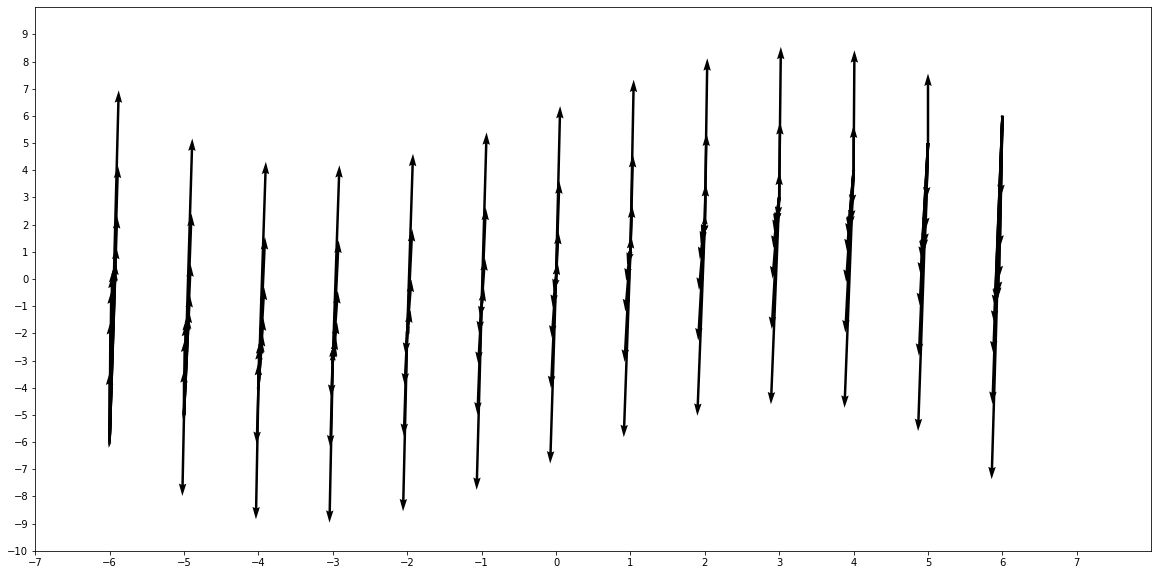

In [491]:
dx = lambda x,y : x - y - 1
dy = lambda x,y : x**3 - y**3 - 7
fig = plt.gcf()
fig.set_size_inches(20, 10)
xticks = np.arange(-7, 8, 1)
yticks = np.arange(-10, 10, 1)
plt.axis((-7, 8, -10, 10))
ax = plt.gca()
ax.set_xticks(xticks)
ax.set_yticks(yticks)

X = np.arange(-6, 7)
Y = np.arange(-6, 7)
XX, YY = np.meshgrid(X, Y)
U = list()
V = list()
for i in X :
    for j in Y :
        U.append(dx(i,j))
        V.append(dy(i,j))
ax.quiver(X, Y, U, V, units='xy', width=0.05, scale=60)
plt.show()